In [6]:
#IMPORTAR LIBRERIAS
import pandas as pd
import json
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# DATA BUSSINESS

In [3]:
# Cargar el conjunto de datos de negocios filtrados
df_business = pd.read_parquet(r'.\business_filtered.parquet')

In [4]:
# Primeras verificaciones de calidad en df_business
business_nulls = df_business.isnull().sum()
business_duplicated = df_business.duplicated(subset=['business_id']).sum()
business_stats = df_business.describe()

# Convertimos la salida a un diccionario para una presentación más limpia
business_eda_results = {
    'Null Values': business_nulls,
    'Duplicated Business IDs': business_duplicated,
    'Statistical Summary': business_stats
}

business_eda_results

{'Null Values': business_id        0
 name               0
 address            0
 city               0
 state              0
 postal_code        0
 latitude           0
 longitude          0
 stars              0
 review_count       0
 is_open            0
 attributes      1173
 categories         9
 hours           2786
 dtype: int64,
 'Duplicated Business IDs': 0,
 'Statistical Summary':            latitude     longitude         stars  review_count       is_open
 count  14580.000000  14580.000000  14580.000000  14580.000000  14580.000000
 mean      39.976172    -75.153507      3.622599     64.236968      0.723594
 std        0.059174      0.111618      0.960950    165.245119      0.447235
 min       36.082662    -86.944270      1.000000      5.000000      0.000000
 25%       39.948044    -75.175787      3.000000      9.000000      0.000000
 50%       39.954382    -75.161036      4.000000     19.000000      1.000000
 75%       40.008132    -75.143919      4.500000     53.000000      1

##### <font color='Crimson'> Se tienen 14580 registros en el dataset de Business, de los cuales solo presentan valores nulos las columnas de Attributes (8% del total), Categories (0.06% del total) y Hours (19% del total). Sin valores duplicados
</font>

In [8]:
# Revision de Columna Stars. Valores deben estar en el rango de 1 a 5 estrellas

business_stars_out_of_range = df_business[~df_business['stars'].isin(np.arange(1, 5.1, 0.5))]
num_business_stars_out_of_range = len(business_stars_out_of_range)
num_business_stars_out_of_range

0

##### <font color='Crimson'> No hay registros fuera del rango de 1 a 5 estrellas. 
</font>

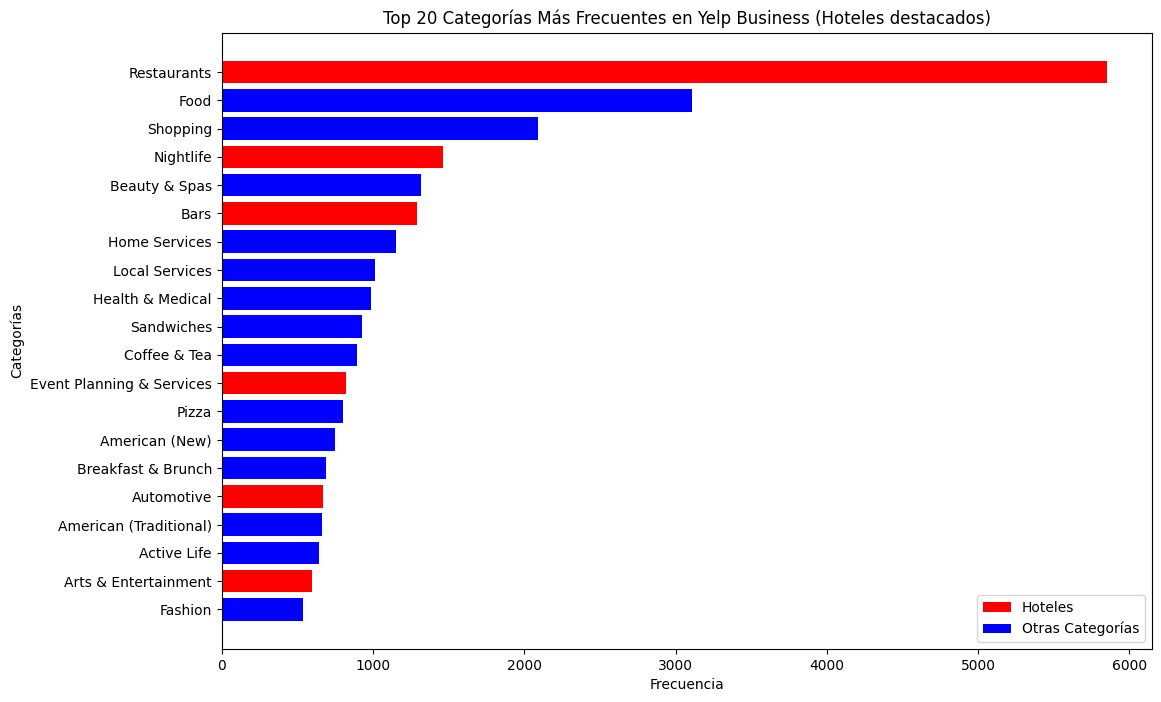

In [9]:
# Analisis de columna categoria

# Buscar categorias relacionadas con hoteles


hotel_related = df_business['categories'].str.contains('Hotel', case=False, na=False)

# Crear contadores para hoteles y otras categorias
counter_hotels = Counter()
counter_others = Counter()

# Asignar valores a los contadores
for categories in df_business.loc[hotel_related, 'categories'].dropna().str.split(', '):
    counter_hotels.update([category.strip() for category in categories])

for categories in df_business.loc[~hotel_related, 'categories'].dropna().str.split(', '):
    counter_others.update([category.strip() for category in categories])

# Seleccionar las 20 categorías más comunes para hoteles y otras categorías
top_hotel_categories = dict(counter_hotels.most_common(20))
top_other_categories = dict(counter_others.most_common(20))

# Asignar el top 20 de categorias mas frecuentes
combined_categories = counter_hotels + counter_others
top_categories = dict(combined_categories.most_common(20))

# Mostrar categorias asociadas con hoteles en rojo
labels, values = zip(*top_categories.items())
colors = ['red' if label in top_hotel_categories else 'blue' for label in labels]

# Crear el histograma
plt.figure(figsize=(12, 8))
bars = plt.barh(labels, values, color=colors)
plt.legend([bars[colors.index('red')], bars[colors.index('blue')]],
           ['Hoteles', 'Otras Categorías'])
plt.xlabel('Frecuencia')
plt.ylabel('Categorías')
plt.title('Top 20 Categorías Más Frecuentes en Yelp Business (Hoteles destacados)')
plt.gca().invert_yaxis()  # Para mostrar la categoría superior en la parte superior del

##### <font color='Crimson'> Se puede observar dentro del top 20 de categorias mas frecuentes que hay al menos 6 categorias relacionadas con hoteles
</font>

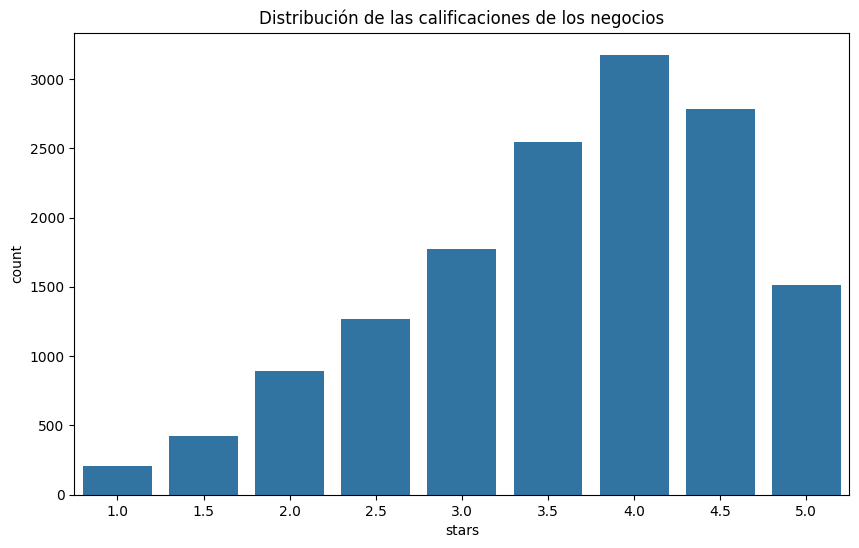

In [10]:
# Histograma de las calificaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=df_business)
plt.title('Distribución de las calificaciones de los negocios')
plt.show()

# DATA CHECKIN

In [2]:
#Abre el archivo y procesa cada línea
with open('Datasetsyelp/checkin.json', 'r', encoding='utf-8') as archivo:
    data = [json.loads(line) for line in archivo]

# Convertir la lista de objetos JSON en un DataFrame
df_check= pd.DataFrame(data)

In [3]:
#Verificamos las dimensiones de la data
df_check.shape

(131930, 2)

In [4]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


##### <font color='Crimson'> La primera columna, business id, es de tipo object y contiene identificadores únicos para cada negocio. La segunda columna, date, es de tipo datetime64[ns] y contiene las fechas de las reseñas.
</font>

In [5]:
df_check.describe()

,business_id,date
count,131930,131930
unique,131930,131930
top,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
freq,1,1


##### <font color='Crimson'> El DataFrame tiene 131.930 filas y 2 columnas, La mayoría de las reseñas (131.930) tienen una fecha única.
</font>

In [6]:
#Observamos si hay datos nulos
datos_nulos1= df_check.isnull().sum()
datos_nulos1

business_id    0
date           0
dtype: int64

##### <font color='Crimson'> No hay valores nulos en ninguna de las columnas.
</font>

In [7]:
#Duplicados
duplicados = df_check[df_check.duplicated()] 
duplicados

,business_id,date


##### <font color='Crimson'> No hay valores duplicados en ninguna de las columnas.
</font>

# DATA REVIEW

In [12]:
# Cargar el conjunto de datos de reseñas filtradas utilizando Dask debido al tamaño potencialmente grande
df_reviews = dd.read_parquet(r'.\part.0.parquet')

In [13]:
# Al usar dask hacemos operaciones similares a business pero usando comando compute()

reviews_nulls = df_reviews.isnull().sum().compute()


# Número de ocurrencias de cada 'review_id'
review_id_counts = df_reviews['review_id'].value_counts().compute()
# Marcar como duplicado aquellos id que tengas mas de 1
duplicated_review_counts = review_id_counts[review_id_counts > 1]
# Duplicados seran conteo total menos id con un solo valor en el conteo
reviews_duplicated = duplicated_review_counts.sum() - duplicated_review_counts.count()

reviews_stats = df_reviews.describe().compute()


# Convertimos la salida a un diccionario para una presentación más limpia
reviews_eda_results = {
    'Null Values': reviews_nulls,
    'Duplicated Review IDs': reviews_duplicated,
    'Statistical Summary': reviews_stats

}

reviews_eda_results

{'Null Values': review_id      0
 user_id        0
 business_id    0
 stars          0
 text           0
 date           0
 dtype: int64,
 'Duplicated Review IDs': 0,
 'Statistical Summary':                stars                           date
 count  967890.000000                         967890
 min         1.000000            2005-02-16 04:06:26
 25%         3.000000  2013-07-21 13:33:14.249999872
 50%         4.000000            2016-04-05 22:28:26
 75%         5.000000  2018-08-23 00:04:02.750000128
 max         5.000000            2022-01-19 19:46:34
 mean        3.785575                           <NA>
 std         1.388296                           <NA>}

##### <font color='Crimson'> Se tienen 967890 registros, sin valores nulos ni duplicados.

</font>

In [14]:
# Revision de Columna Stars. Valores deben estar en el rango de 1 a 5 estrellas

reviews_stars_out_of_range = df_reviews[~df_reviews['stars'].isin(np.arange(1, 5.1, 0.5))].compute()
num_reviews_stars_out_of_range = len(reviews_stars_out_of_range)
num_reviews_stars_out_of_range

0

##### <font color='Crimson'> No hay valores que indiquen estar fuera del rango de 1 a 5 estrellas
</font>

### <font color='Crimson'> Como observacion final antes del ETL. Se puede reducir el rango de fechas a las mas actuales ya que contamos con datos del año 2005 en adelante.
</font>

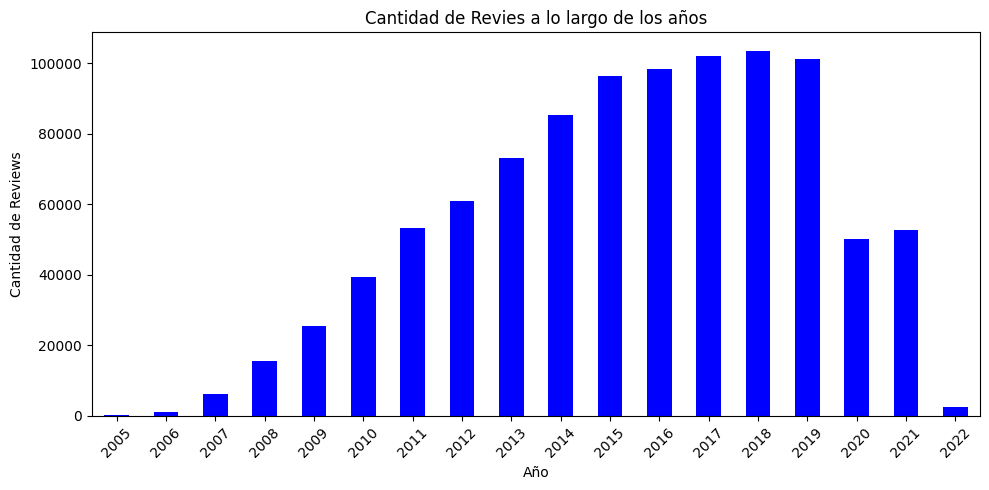

In [15]:
# Assuming df_reviews is your Dask DataFrame and 'date' is the column with review dates
df_reviews['date'] = dd.to_datetime(df_reviews['date'], errors='coerce')

# Group by year and count reviews
reviews_per_year = df_reviews.groupby(df_reviews['date'].dt.year).size().compute()

# Plotting the time series
plt.figure(figsize=(10, 5))
reviews_per_year.plot(kind='bar', color='blue')
plt.title('Cantidad de Revies a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# DATA TIP

In [8]:
#Abre el archivo y procesa cada línea
with open('Datasetsyelp/tip.json', 'r', encoding='utf-8') as archivo:
    data = [json.loads(line) for line in archivo]

# Convertir la lista de objetos JSON en un DataFrame
df_tip= pd.DataFrame(data)

In [11]:
#Observamos las dimensiones de la data
df_tip.shape

(908915, 5)

In [9]:
df_tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [10]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908915 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


##### <font color='Crimson'> Tiene cantidad de datos de 908,915 filas y 5 columnas que son destinadas a reseñas de usuarios a mejoras de los establecimientos.
</font>

In [12]:
#Revisamos los datos nulos
datos_nulos2= df_tip.isnull().sum()
datos_nulos2

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

##### <font color='Crimson'> No hay valores Nulos en ninguna de las columnas.
</font>

In [13]:
#Verificamos duplicados
duplicados = df_tip[df_tip.duplicated()] 
duplicados

,user_id,business_id,text,date,compliment_count
29901,00Cz_vdInMHpTRjqbWjK5Q,ncacMQ9n_dSM1cR3c1vTQw,Miss saigon,2010-12-07 01:59:12,0
58887,47zMh_WgunwRDf7Cx2WyYw,J8vz_zwZaxzA585lV_k_vA,Com chien and mi are delish!,2011-07-23 17:22:58,0
99407,WQ8shYm0ghNDz97BuHI1fA,Sv1MEZP-mMfp8SmE0hwYEA,love the crispy buns!,2017-10-18 23:29:03,0
126358,hGxVvXVg7IK4J2aTiGMSIQ,5RsVAkDnMrcSbErS6P1eew,"Pricey, often crowded, and staff are not alway...",2017-10-20 22:08:25,0
129213,1gDoko0TrN0lnQlMC2JtXw,06PmqoU3uY5Vb-BEaMPVfw,"We ordered a pizza on New Year's Day, it never...",2014-02-20 04:09:37,0
...,...,...,...,...,...
793788,nnWFrvhO2jeq0KbG_CKCYA,jmG_QxXXfz2cnw9dQCXJLQ,"Great place, great baked goods!",2019-06-08 17:06:50,0
794036,ajDPsSD77sxcVttPfftBRQ,DTxB12bQaZ1m-nLeXWX2rw,Good service and delicious food,2017-09-12 23:01:50,0
820290,wYo3aBVj-bRPT7E4RSj5Kg,W5SNps2JaT_RozLAl_TN1Q,Worker there are the best at serving me quick ...,2017-12-17 01:10:52,0
873070,TEjijSowDwJM4vCL-zn4ew,YPHDzg1h-PkaxfoppT-iJg,bleed blue,2011-09-26 00:03:49,0


In [14]:
#Comprobamos los datos duplicados o si son solos diferentes review del mismo usuario
df_filtrado = df_tip.loc[df_tip['user_id'] == "00Cz_vdInMHpTRjqbWjK5Q" ]
df_filtrado

,user_id,business_id,text,date,compliment_count
11367,00Cz_vdInMHpTRjqbWjK5Q,ncacMQ9n_dSM1cR3c1vTQw,Miss saigon,2010-12-07 01:59:12,0
29901,00Cz_vdInMHpTRjqbWjK5Q,ncacMQ9n_dSM1cR3c1vTQw,Miss saigon,2010-12-07 01:59:12,0


In [15]:
#Eliminamos los datos duplicados
df_tip=  df_tip.drop_duplicates()

In [16]:
df_tip

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


##### <font color='Crimson'>  Habian 67 rows × 5 columns duplicados. Verificamos que no fueran diferentes reviews de un mismo usuario y observamos que eran iguales asi que se elimianaron
</font>

# DATA USER 

In [18]:
df_user= pd.read_parquet(r'.\user_data.parquet')
df_user

,user_id,name,since,review_count,fans,stars,friends
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,2007-01-25 16:47:26,585,267,3.91,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA..."
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,2009-01-25 04:35:42,4333,3138,3.74,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A..."
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,2008-07-25 10:41:00,665,52,3.32,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA..."
3,SZDeASXq7o05mMNLshsdIA,Gwen,2005-11-29 04:38:33,224,28,4.27,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg..."
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,2007-01-05 19:40:59,79,1,3.54,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA..."
...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,2012-01-19 23:33:02,38,0,2.98,kmwNG5LZSHFmveg6wYYdrw
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,2009-06-09 16:34:54,19,1,3.68,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg..."
2105594,tpBznnD6uJN3m_pJubj09w,Emily,2013-08-13 23:18:11,26,0,3.85,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg..."
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,2015-01-10 00:06:25,25,0,2.85,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg..."


In [19]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       object 
 1   name          object 
 2   since         object 
 3   review_count  int64  
 4   fans          int64  
 5   stars         float64
 6   friends       object 
dtypes: float64(1), int64(2), object(4)
memory usage: 112.5+ MB


In [20]:
df_user.describe()

,review_count,fans,stars
count,2.105597e+06,2.105597e+06,2.105597e+06
mean,2.846875e+01,1.913746e+00,3.641863e+00
std,1.042146e+02,2.436510e+01,1.159519e+00
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.000000e+00,0.000000e+00,3.000000e+00
50%,6.000000e+00,0.000000e+00,3.880000e+00
75%,1.900000e+01,0.000000e+00,4.500000e+00
max,1.747300e+04,1.249700e+04,5.000000e+00


In [21]:
#verificamos valores nulos
porcentaje_nulos = (df_user.isnull().mean() * 100).round(2)
print(porcentaje_nulos)

user_id         0.0
name            0.0
since           0.0
review_count    0.0
fans            0.0
stars           0.0
friends         0.0
dtype: float64


##### <font color='Crimson'> No hay valores nulos en las columnas
</font>

In [22]:
#Columnas existentes en la data
df_user.columns

Index(['user_id', 'name', 'since', 'review_count', 'fans', 'stars', 'friends'], dtype='object')

In [23]:
#Verificamos duplicados
duplicados = df_user[df_user.duplicated()] 
duplicados

,user_id,name,since,review_count,fans,stars,friends
1987897,qVc8ODYU5SZjKXVBgXdI7w,Walker,2007-01-25 16:47:26,585,267,3.91,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA..."
1987898,j14WgRoU_-2ZE1aw1dXrJg,Daniel,2009-01-25 04:35:42,4333,3138,3.74,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A..."
1987899,2WnXYQFK0hXEoTxPtV2zvg,Steph,2008-07-25 10:41:00,665,52,3.32,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA..."
1987900,SZDeASXq7o05mMNLshsdIA,Gwen,2005-11-29 04:38:33,224,28,4.27,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg..."
1987901,hA5lMy-EnncsH4JoR-hFGQ,Karen,2007-01-05 19:40:59,79,1,3.54,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA..."
...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,2012-01-19 23:33:02,38,0,2.98,kmwNG5LZSHFmveg6wYYdrw
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,2009-06-09 16:34:54,19,1,3.68,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg..."
2105594,tpBznnD6uJN3m_pJubj09w,Emily,2013-08-13 23:18:11,26,0,3.85,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg..."
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,2015-01-10 00:06:25,25,0,2.85,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg..."


In [24]:
#Comprobamos los datos duplicados o si son solos diferentes review del mismo usuario
df_filtrado = df_user.loc[df_user['user_id'] == "Kst_srPw7GdYydMFYdCtzw" ]
df_filtrado

,user_id,name,since,review_count,fans,stars,friends
91098,Kst_srPw7GdYydMFYdCtzw,Heatheranne,2015-01-10 00:06:25,25,0,2.85,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg..."
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,2015-01-10 00:06:25,25,0,2.85,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg..."


In [26]:
#Eliminamos los datos duplicados
df_user=  df_user.drop_duplicates()

##### <font color='Crimson'>  Habian  117700 rows × 7 columns duplicados. Verificamos que no fueran diferentes reviews de un mismo usuario y observamos que eran iguales asi que se elimianaron
</font>

In [27]:
#Vemos valores por usuario
usuarios=df_user["name"].value_counts()
usuarios

name
John         18719
Michael      16645
David        15967
Chris        14591
Mike         13390
             ...  
Udochukwu        1
Trak             1
Rhaya            1
Mikiya           1
Gwendy           1
Name: count, Length: 132361, dtype: int64

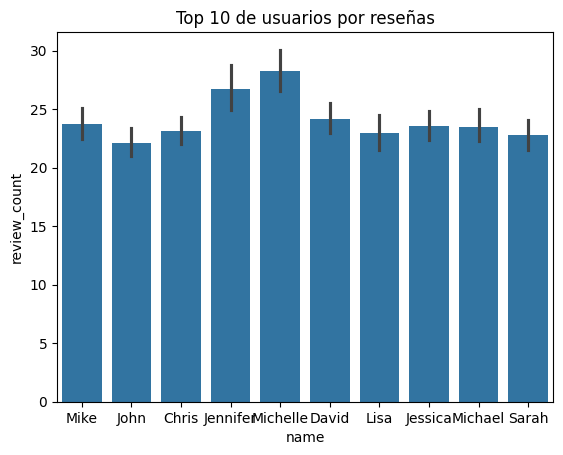

In [28]:
# Filter the top 10 users
top_10_users = df_user.groupby('name')['review_count'].count().sort_values(ascending=False).head(10).index

# Create a bar chart
sns.barplot(x="name", y="review_count", data=df_user[df_user['name'].isin(top_10_users)])
plt.title("Top 10 de usuarios por reseñas")
plt.show()
